In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
 df = pd.read_csv('train_set.csv')

# Analyzing the dataframe by checking the head and info

In [3]:
df.head()

,hotel_id,city_id,content_score,n_images,distance_to_center,avg_rating,stars,n_reviews,avg_rank,avg_price,avg_saving_percent,n_clicks
0,9.767406e+10,134520.0,70.0,2.0,1199.0,77.0,4.0,861.0,17.550,81.64,18.0,0
1,9.768889e+10,133876.0,67.0,3.0,12585.0,90.0,4.0,4371.0,17.383,189.38,28.0,4
2,9.811544e+10,133732.0,39.0,3.0,23491.0,83.0,3.0,1005.0,16.438,57.63,27.0,44
3,9.824279e+10,43772.0,59.0,8.0,3291.0,73.0,2.0,3084.0,7.000,72.16,2.0,4
4,9.833438e+10,50532.0,66.0,1.0,288.0,80.0,0.0,603.0,12.564,173.25,0.0,10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396487 entries, 0 to 396486
Data columns (total 12 columns):
hotel_id              396487 non-null float64
city_id               395979 non-null float64
content_score         395979 non-null float64
n_images              395978 non-null float64
distance_to_center    395958 non-null float64
avg_rating            286089 non-null float64
stars                 395925 non-null float64
n_reviews             395958 non-null float64
avg_rank              396487 non-null float64
avg_price             396317 non-null float64
avg_saving_percent    396317 non-null float64
n_clicks              396487 non-null int64
dtypes: float64(11), int64(1)
memory usage: 36.3 MB


# checking and plotting the nan values in the dataframe

In [5]:
df.isnull().sum()

hotel_id                   0
city_id                  508
content_score            508
n_images                 509
distance_to_center       529
avg_rating            110398
stars                    562
n_reviews                529
avg_rank                   0
avg_price                170
avg_saving_percent       170
n_clicks                   0
dtype: int64

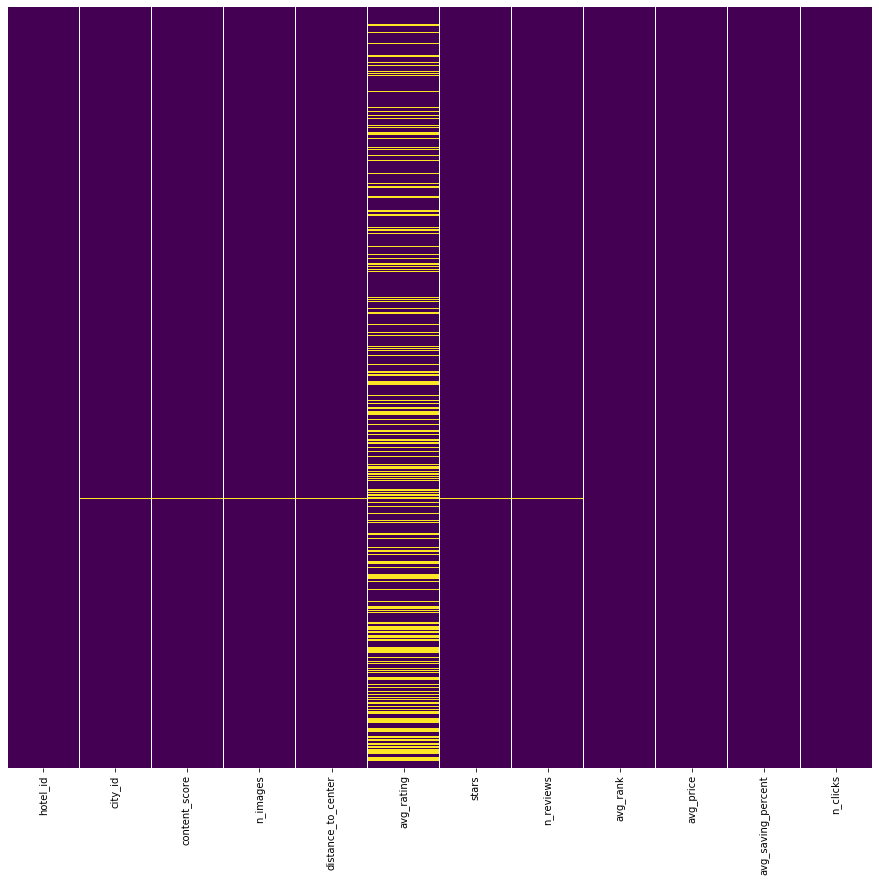

In [6]:
plt.figure(figsize=(15.5,14))
sns.heatmap(df.isnull(), cbar = False, yticklabels= False, cmap = 'viridis')

As we can see from the above graph the nan values in column are missing in the same rows except the columns in avg_price and avg_saving_percent

Also we have a large number of nan values in avg_rating

# Dropping the nan values and filling the avg_rating nan values

In [7]:
df['city_id'].nunique()

33213

In [8]:
df['hotel_id'].nunique()

396487

In [9]:
df.drop(['hotel_id', 'city_id'], inplace = True, axis = 1)

Due to memory constrains and less correlation of city_id feature with number of clicks we can safely ignore the respective feature.

In [10]:
df_na = df.dropna(subset = (['content_score', 'distance_to_center', 'avg_price', 'stars']))

In [11]:
df_na.head()

,content_score,n_images,distance_to_center,avg_rating,stars,n_reviews,avg_rank,avg_price,avg_saving_percent,n_clicks
0,70.0,2.0,1199.0,77.0,4.0,861.0,17.550,81.64,18.0,0
1,67.0,3.0,12585.0,90.0,4.0,4371.0,17.383,189.38,28.0,4
2,39.0,3.0,23491.0,83.0,3.0,1005.0,16.438,57.63,27.0,44
3,59.0,8.0,3291.0,73.0,2.0,3084.0,7.000,72.16,2.0,4
4,66.0,1.0,288.0,80.0,0.0,603.0,12.564,173.25,0.0,10


In [12]:
df_na.isnull().sum()

content_score              0
n_images                   0
distance_to_center         0
avg_rating            109734
stars                      0
n_reviews                  0
avg_rank                   0
avg_price                  0
avg_saving_percent         0
n_clicks                   0
dtype: int64

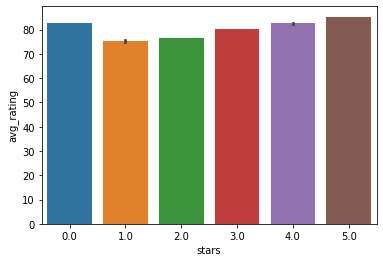

In [13]:
sns.barplot(x = 'stars', y = 'avg_rating', data = df_na)

Filling the nan values of avg_rating with respect to the mean of avg_rating for idividual star rating of the hotel.

In [14]:
mean_avg_rating_star = df_na.groupby('stars').avg_rating.mean()

In [15]:
df_na.avg_rating = df_na.groupby('stars')['avg_rating'].apply(lambda x: x.fillna(x.mean()))

C:\Users\surya\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [16]:
df_na.isnull().sum()

content_score         0
n_images              0
distance_to_center    0
avg_rating            0
stars                 0
n_reviews             0
avg_rank              0
avg_price             0
avg_saving_percent    0
n_clicks              0
dtype: int64

In [17]:
df_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395760 entries, 0 to 396473
Data columns (total 10 columns):
content_score         395760 non-null float64
n_images              395760 non-null float64
distance_to_center    395760 non-null float64
avg_rating            395760 non-null float64
stars                 395760 non-null float64
n_reviews             395760 non-null float64
avg_rank              395760 non-null float64
avg_price             395760 non-null float64
avg_saving_percent    395760 non-null float64
n_clicks              395760 non-null int64
dtypes: float64(9), int64(1)
memory usage: 43.2 MB


In [18]:
df_na.describe()

,content_score,n_images,distance_to_center,avg_rating,stars,n_reviews,avg_rank,avg_price,avg_saving_percent,n_clicks
count,395760.000000,3.957600e+05,3.957600e+05,395760.000000,395760.000000,395760.000000,395760.000000,395760.000000,395760.000000,395760.000000
mean,50.998168,2.594637e+02,1.634567e+04,81.890399,1.159817,913.977024,14.698238,109.305688,7.179389,13.790722
std,11.559788,1.732158e+04,2.752866e+05,5.163673,1.619751,2432.950137,5.600627,148.138436,13.081077,123.644148
min,7.000000,-1.000000e+00,0.000000e+00,34.000000,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000
25%,45.000000,0.000000e+00,5.440000e+02,80.000000,0.000000,0.000000,11.100000,51.040000,0.000000,0.000000
50%,53.000000,1.000000e+00,1.516000e+03,82.767223,0.000000,189.000000,15.000000,77.640000,0.000000,0.000000
75%,59.000000,2.000000e+00,4.163000e+03,85.000000,3.000000,777.000000,18.375000,120.920000,10.000000,2.000000
max,81.000000,2.393911e+06,1.834155e+07,97.000000,5.000000,283089.000000,100.000000,8000.000000,99.000000,13742.000000


# Identifying and removing the outliers from the dataframe

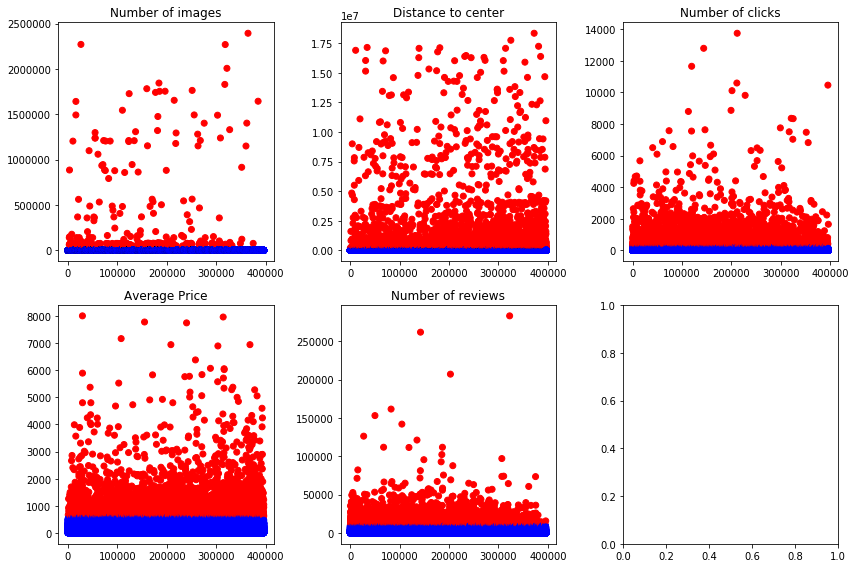

In [19]:
fig, ax = plt.subplots(2,3,figsize = (12,8))
col = np.where(df_na.index>df_na.index.max(),'b',np.where(df_na.n_images>df_na.n_images.quantile(0.99),'r','b'))
ax[0,0].scatter(df_na.index, df_na.n_images, c = col)
ax[0,0].set_title('Number of images')


col1 = np.where(df_na.index>df_na.index.max(),'b',np.where(df_na.distance_to_center>df_na.distance_to_center.quantile(0.99),'r','b'))
ax[0,1].scatter(df_na.index, df_na.distance_to_center, c=col1)
ax[0,1].set_title('Distance to center')


col2 = np.where(df_na.index>df_na.index.max(),'b',np.where(df_na.n_reviews>df_na.n_reviews.quantile(0.99),'r','b'))
ax[1,1].scatter(df_na.index, df_na.n_reviews, c=col2)
ax[1,1].set_title('Number of reviews')



col3 = np.where(df_na.index>df_na.index.max(),'b',np.where(df_na.avg_price>df_na.avg_price.quantile(0.99),'r','b'))
ax[1,0].scatter(df_na.index, df_na.avg_price,  c=col3)
ax[1,0].set_title('Average Price')

col4 = np.where(df_na.index>df_na.index.max(),'b',np.where(df_na.n_clicks>df_na.n_clicks.quantile(0.99),'r','b'))
ax[0,2].scatter(df_na.index, df_na.n_clicks,  c=col4)
ax[0,2].set_title('Number of clicks')


plt.tight_layout()

As seen in the describtion of the dataframe the max values are very high. By analyzing a scatter plot I decided to consider only 0.99 quantile of the data

In [20]:
quantile = df_na[['avg_price','n_reviews','n_images','distance_to_center','n_clicks']].quantile(.99)

In [21]:
data = df_na.query(f"""n_images<={quantile.n_images} & n_reviews<={quantile.n_reviews} & avg_price<= {quantile.avg_price} & distance_to_center<={quantile.distance_to_center} & n_clicks<={quantile.n_clicks}""")

In [22]:
data.head()

,content_score,n_images,distance_to_center,avg_rating,stars,n_reviews,avg_rank,avg_price,avg_saving_percent,n_clicks
0,70.0,2.0,1199.0,77.0,4.0,861.0,17.550,81.64,18.0,0
1,67.0,3.0,12585.0,90.0,4.0,4371.0,17.383,189.38,28.0,4
2,39.0,3.0,23491.0,83.0,3.0,1005.0,16.438,57.63,27.0,44
3,59.0,8.0,3291.0,73.0,2.0,3084.0,7.000,72.16,2.0,4
4,66.0,1.0,288.0,80.0,0.0,603.0,12.564,173.25,0.0,10


# Checking the correlation of the dataframe

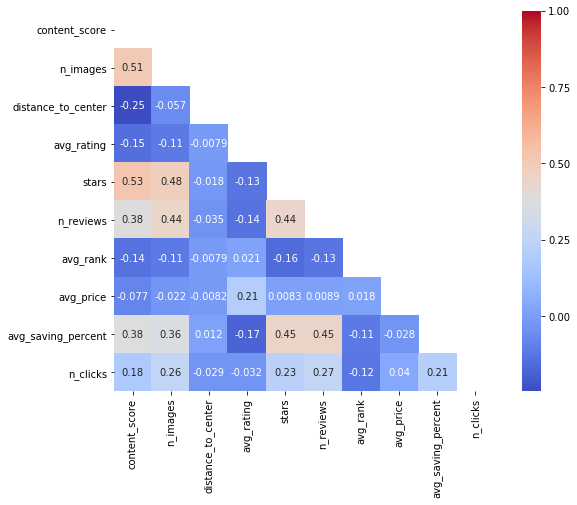

In [23]:
corr = data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),mask = mask, cmap = 'coolwarm',annot =True, square = True)

From the correlation we could understand the following features influence the n_clicks

In [24]:
data.corrwith(data.n_clicks)

content_score         0.180010
n_images              0.260724
distance_to_center   -0.029293
avg_rating           -0.031646
stars                 0.227789
n_reviews             0.268852
avg_rank             -0.123291
avg_price             0.040331
avg_saving_percent    0.213236
n_clicks              1.000000
dtype: float64

# Normalisingthe data

As the data in this dataset varies from different range of numbers we use StandardScaler to transform the data in such a manner that it has mean as 0 and standard deviation as 1

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X=data.drop('n_clicks',axis =1)
y = data['n_clicks']

X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.1, random_state =42)

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
sc = StandardScaler()

In [29]:
sc_x = sc.fit(X_train)

In [30]:
sc_x = sc.transform(X_train)

In [31]:
sc_x_t = sc.transform(X_test)

# Model Selection

Zero-inflated model:

Zero-inflatedPoisson regression model is used to model count data that has an excess of zero counts. The zero-inflated Poisson (ZIP) model employs two components. The first process is governed by a binary distribution that generates structural zeros. The second process is governed by a Poisson distribution that generates counts, some of which may be zero. 

In [32]:
from statsmodels.discrete.count_model import ZeroInflatedPoisson as ZIP

In [33]:
model = ZIP(endog = (y_train/2).astype(int), exog=sc_x).fit()

C:\Users\surya\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 4.340044
         Iterations: 17
         Function evaluations: 23
         Gradient evaluations: 23


As observed in the target column n-clicks the data is in even numbers so to match the values we divide the y_train data by 2 

In [34]:
predict = model.predict(sc_x_t, exog_infl=np.ones((len(sc_x_t),1)))

In [35]:
pred_zip = predict*2

we multiply predicted values again by 2 as the y_train predicts only half

In [36]:
def normalised_weighted_mean_square_error(y_test, predict):
    
    weight = np.log(y_test + 1) +1
    square_error = (predict - y_test)**2
    weighted_square_error = (weight*square_error).sum()
    weighted_mean_squar_error = weighted_square_error/len(weight)
    normalised_weighted_mean_squared_error = weighted_mean_squar_error/sum(weight)
    return normalised_weighted_mean_squared_error

normalized weighted mean square error for validation

In [37]:
normalised_weighted_mean_square_error(y_test, pred_zip)

0.03514984071055207

In [38]:
from sklearn.model_selection import KFold

Cross-validation is a resampling procedure used to evaluate machine learning models on a data sample.

KFold cross validator provides train/test indices to train/test sets. Kfold shuffels the data into K consecutive folds instead of default shuffling.

That KFold cross validation is a procedure used to estimate the skill of the model on new data.

The procedure has a single parameter k that refers to the number of groups the given data is split

In [39]:
kf = KFold(n_splits=5, random_state =42)

In [40]:
history = {} 
fold = 0
for train_index, test_index in kf.split(X):
    fold += 1
    x_train, x_test = X.iloc[train_index, :].copy(), X.iloc[test_index, :].copy()
    y_train, y_test = y.iloc[train_index].copy(), y.iloc[test_index].copy()
    
    sc = StandardScaler()
    sc.fit(x_train)
    x_train = sc.transform(x_train)
    x_test = sc.transform(x_test)
    
    model = ZIP(endog=(y_train/2).astype(int), exog=x_train).fit()
    predict = model.predict(x_test, exog_infl=np.ones((len(x_test),1)))
    
    error = normalised_weighted_mean_square_error(y_test, predict*2)
    print(f"K-Fold {fold}: Error-{round(error*100, 2)}%")
    history[fold] = {'model': model, 'predict': predict, 'error': error}

C:\Users\surya\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 4.141583
         Iterations: 17
         Function evaluations: 22
         Gradient evaluations: 22
K-Fold 1: Error-2.07%


C:\Users\surya\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 4.080141
         Iterations: 18
         Function evaluations: 24
         Gradient evaluations: 24
K-Fold 2: Error-2.18%


C:\Users\surya\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 4.265507
         Iterations: 17
         Function evaluations: 22
         Gradient evaluations: 22
K-Fold 3: Error-1.89%


C:\Users\surya\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 4.458992
         Iterations: 16
         Function evaluations: 22
         Gradient evaluations: 22
K-Fold 4: Error-1.5%


C:\Users\surya\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 4.820854
         Iterations: 17
         Function evaluations: 22
         Gradient evaluations: 22
K-Fold 5: Error-1.02%


# Reading the test file and creating the submission file

In [41]:
test = pd.read_csv('test_set.csv')

In [42]:
test.isnull().sum()

hotel_id                  0
city_id                 155
content_score           155
n_images                156
distance_to_center      163
avg_rating            36630
stars                   175
n_reviews               163
avg_rank                  0
avg_price                58
avg_saving_percent       58
dtype: int64

In [43]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132162 entries, 0 to 132161
Data columns (total 11 columns):
hotel_id              132162 non-null int64
city_id               132007 non-null float64
content_score         132007 non-null float64
n_images              132006 non-null float64
distance_to_center    131999 non-null float64
avg_rating            95532 non-null float64
stars                 131987 non-null float64
n_reviews             131999 non-null float64
avg_rank              132162 non-null float64
avg_price             132104 non-null float64
avg_saving_percent    132104 non-null float64
dtypes: float64(10), int64(1)
memory usage: 11.1 MB


In [44]:
test.dropna(subset = (['content_score', 'distance_to_center', 'avg_price', 'stars']), inplace=True)

In [45]:
test.isnull().sum()

hotel_id                  0
city_id                   0
content_score             0
n_images                  0
distance_to_center        0
avg_rating            36419
stars                     0
n_reviews                 0
avg_rank                  0
avg_price                 0
avg_saving_percent        0
dtype: int64

In [46]:
hotel_id = test.hotel_id.copy()

In [47]:
test.drop(['hotel_id', 'city_id'], inplace = True, axis = 1)

In [48]:
test.avg_rating = test.groupby('stars')['avg_rating'].apply(lambda x: x.fillna(x.mean()))

In [49]:
test.isnull().sum()

content_score         0
n_images              0
distance_to_center    0
avg_rating            0
stars                 0
n_reviews             0
avg_rank              0
avg_price             0
avg_saving_percent    0
dtype: int64

In [50]:
model = history[5]['model']

In [51]:
test = sc.transform(test)

In [52]:
test_predict = model.predict(test, exog_infl=np.ones((len(test),1)))
test_predict = (test_predict*2).astype(np.int)

In [53]:
submission = pd.DataFrame({'hotel_id':hotel_id, 'n_clicks': test_predict})

In [55]:
submission.to_csv('hotel_clicks_test_submission.csv', index=False)